In [ ]:
import os
import zipfile
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

In [ ]:


# Unzips the folder as the data is in zip format
zip_path = 'Group_4.zip'
extract_path = '/content/extracted_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

def get_dataset_size(folder_path):
  total_files = 0
  for root, _, files in os.walk(folder_path):
    for file in files:
      if os.path.isfile(os.path.join(root, file)):
        total_files += 1
  return total_files

folder_path = "/content/extracted_dataset/Group_4"
dataset_size = get_dataset_size(folder_path)
print(f"The size of your dataset is {dataset_size} files.")


train_path = os.path.join(extract_path, 'Group_4/train')

test_path = os.path.join(extract_path, 'Group_4/test')


if os.path.exists(train_path):
    print(f"Train batch exists at {train_path}.")
else:
    print("No separate train batch found.")

if os.path.exists(test_path):
    print(f"Test batch exists at {test_path}.")
else:
    print("No separate test batch found.")



# This get_class method retrieves the subfolder names in the train and test folders. Because the data is grouped by classes into subfolders, this gives us the textual names of classes available.
def get_classes(folder_path):
    classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    return classes

if os.path.exists(train_path):
    train_classes = get_classes(train_path)
    print(f"Classes in the train batch: {train_classes}")
if os.path.exists(test_path):
    test_classes = get_classes(test_path)
    print(f"Classes in the test batch: {test_classes}")



The size of your dataset is 2400 files.
Train batch exists at /content/extracted_dataset/Group_4/train.
Test batch exists at /content/extracted_dataset/Group_4/test.
Classes in the train batch: ['compass', 'pay-phone', 'lifeboat', 'moving-van', 'limousine']
Classes in the test batch: ['compass', 'pay-phone', 'lifeboat', 'moving-van', 'limousine']


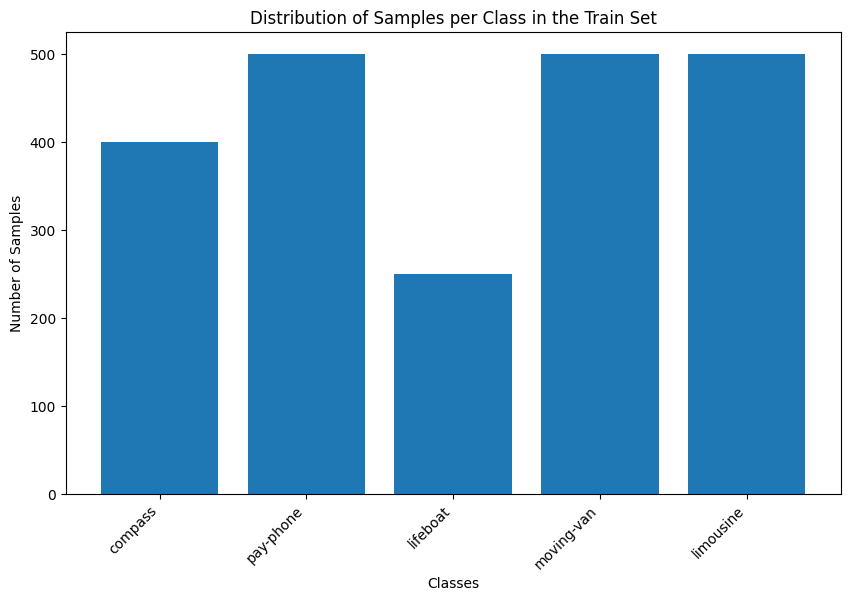

In [ ]:
# Shows the balance of dataset
def get_class_distribution(folder_path):
    class_distribution = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            num_samples = len(os.listdir(class_path))
            class_distribution[class_name] = num_samples
    return class_distribution


train_path = '/content/extracted_dataset/Group_4/train'

# train dataset sending into get_class_distribution class
train_class_distribution = get_class_distribution(train_path)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(train_class_distribution.keys(), train_class_distribution.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class in the Train Set')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:

# Step 4: Identify different classes
def get_classes(folder_path):
    classes = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    return classes

if os.path.exists(train_path):
    train_classes = get_classes(train_path)
    print(f"Classes in the train batch: {train_classes}")
if os.path.exists(test_path):
    test_classes = get_classes(test_path)
    print(f"Classes in the test batch: {test_classes}")

# preprocess
def load_and_preprocess_images(folder_path, target_size=(64, 64)):
    data = []
    labels = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = Image.open(image_path).convert('L')  # Converting to grayscale, to reduce the computation cost
                image = image.resize(target_size)
                data.append(np.array(image).flatten())
                labels.append(class_name)
    return np.array(data), np.array(labels)

# Load and preprocess training data
X_train, y_train = load_and_preprocess_images(train_path)

# Load and preprocess test data
X_test, y_test = load_and_preprocess_images(test_path)

#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#imbalance handling
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

#Logistic regrssion classifier
model = LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weight_dict)
model.fit(X_train, y_train)

#training set prediction
y_train_pred = model.predict(X_train)

#evaulation
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

print("Results on the training set:")
print(f"Accuracy: {train_accuracy}")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Classification Report:\n{train_classification_report}")

# test set pred
y_test_pred = model.predict(X_test)

# test set evaulation
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("\nResults on the test set:")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_report}")


Classes in the train batch: ['compass', 'pay-phone', 'lifeboat', 'moving-van', 'limousine']
Classes in the test batch: ['compass', 'pay-phone', 'lifeboat', 'moving-van', 'limousine']
Results on the training set:
Accuracy: 1.0
Confusion Matrix:
[[400   0   0   0   0]
 [  0 250   0   0   0]
 [  0   0 500   0   0]
 [  0   0   0 500   0]
 [  0   0   0   0 500]]
Classification Report:
              precision    recall  f1-score   support

     compass       1.00      1.00      1.00       400
    lifeboat       1.00      1.00      1.00       250
   limousine       1.00      1.00      1.00       500
  moving-van       1.00      1.00      1.00       500
   pay-phone       1.00      1.00      1.00       500

    accuracy                           1.00      2150
   macro avg       1.00      1.00      1.00      2150
weighted avg       1.00      1.00      1.00      2150


Results on the test set:
Accuracy: 0.332
Confusion Matrix:
[[14  6  7  9 14]
 [12 11  4  9 14]
 [ 3  5 22 10 10]
 [ 7  7 11 17 

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:



X_train, y_train = load_and_preprocess_images(train_path)

X_test, y_test = load_and_preprocess_images(test_path)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#class label to unique numerical values
label_to_index = {label: index for index, label in enumerate(np.unique(y_train))}
y_train_numeric = np.array([label_to_index[label] for label in y_train])

#handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_numeric), y=y_train_numeric)
class_weight_dict = dict(zip(np.unique(y_train_numeric), class_weights))

# Using sigmoid and softmax
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(len(np.unique(y_train_numeric)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fitting
model.fit(X_train, y_train_numeric, epochs=30, batch_size=256, class_weight=class_weight_dict)


train_results = model.evaluate(X_train, y_train_numeric)
print("Results on the training set:")
print(f"Accuracy: {train_results[1]}")


y_test_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_probs, axis=1)


y_test_numeric = np.array([label_to_index[label] for label in y_test])


test_accuracy = accuracy_score(y_test_numeric, y_test_pred)
test_conf_matrix = confusion_matrix(y_test_numeric, y_test_pred)
test_classification_report = classification_report(y_test_numeric, y_test_pred)

print("\nResults on the test set:")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Classification Report:\n{test_classification_report}")

Epoch 1/30
9/9 [==============================] - 4s 38ms/step - loss: 1.5866 - accuracy: 0.2888
Epoch 2/30
9/9 [==============================] - 0s 37ms/step - loss: 1.5213 - accuracy: 0.3814
Epoch 3/30
9/9 [==============================] - 0s 37ms/step - loss: 1.4885 - accuracy: 0.4437
Epoch 4/30
9/9 [==============================] - 0s 40ms/step - loss: 1.4504 - accuracy: 0.4740
Epoch 5/30
9/9 [==============================] - 0s 33ms/step - loss: 1.4107 - accuracy: 0.4902
Epoch 6/30
9/9 [==============================] - 0s 23ms/step - loss: 1.3680 - accuracy: 0.5200
Epoch 7/30
9/9 [==============================] - 0s 25ms/step - loss: 1.3209 - accuracy: 0.5456
Epoch 8/30
9/9 [==============================] - 0s 26ms/step - loss: 1.2734 - accuracy: 0.5642
Epoch 9/30
9/9 [==============================] - 0s 22ms/step - loss: 1.2232 - accuracy: 0.5949
Epoch 10/30
9/9 [==============================] - 0s 23ms/step - loss: 1.1736 - accuracy: 0.6242
Epoch 11/30
9/9 [============